In [3]:
## remember to run conn_cocolab from the terminal before running cells in this notebook!

import os
import urllib, cStringIO

import pymongo as pm

import matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

import numpy as np
from __future__ import division
import scipy.stats as stats
import pandas as pd
import json
import re

from PIL import Image
import base64

/Users/brialong/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
# directory & file hierarchy
iterationName = 'test'
exp_path = 'museumdraw'
analysis_dir = os.getcwd()
exp_dir = os.path.abspath(os.path.join(os.getcwd(),'../..','experiments'))

In [5]:
# set vars 
auth = pd.read_csv('../auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'rxdhawkins.me' ## cocolab ip address

# have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['kiddraw']
coll = db['pilot0']

In [6]:
coll.count()

4

In [13]:
final_images = coll.find({'dataType':'finalImage'}).sort('time')
imsize = 224
for rec in final_images:
    imgData = rec['imgData']
    filestr = base64.b64decode(imgData)
    fname = os.path.join('sketch_{}_{}.png'.format(rec['category'],rec['trialNum']))
    with open(fname, "wb") as fh:
        fh.write(imgData.decode('base64'))
    im = Image.open(fname).resize((imsize,imsize))

In [9]:
coll.distinct('dataType')

[u'finalImage']

In [10]:
coll.distinct('dataType')

[u'finalImage']

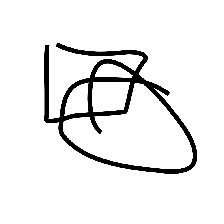

In [15]:
im